## Worksheet 3
- This is my submission for the same
- I would explaining every step on the way

- Importing important libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Q1
### 0. Defining the required methods
- 4 different methods to find the slope of a function, numerically.
- then defining the test function and the function to be calculated on at a specific point, named as `x_n` below

In [2]:
def forward_diff(f,x_n,h):
    return (f(x_n + h) - f(x_n)) / h

def backward_diff(f,xn,h):
    return (f(x_n) - f(x_n-h)) / h

def central_diff(f,x_n,h):
    return (f(x_n + h) - f(x_n - h)) / (2 * h)

def five_point_approx(f,x_n,h):
    return (f(x_n - 2*h) - 8*f(x_n - h) + 8*f(x_n + h) - f(x_n + 2 * h)) / (12 * h)

In [5]:
def f(x):
    return np.sin(x)

hs = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]

xn = 2*np.pi/5 # x = 2*π/5
exact = np.cos(x_n)

### 1.a

In [6]:
print("%10s %10s %10s %10s %10s %10s"%("h values","Forward","Backward","Central","5 point","Exact"))
print()
for h in hs:
    print("%10.6f %10.6f %10.6f %10.6f %10.6f %10.6f"%(h, forward_diff(f,xn,h),backward_diff(f,xn,h),central_diff(f,xn,h),five_point_approx(f,xn,h),exact))

  h values    Forward   Backward    Central    5 point      Exact

  0.500000   0.063449   0.529153   0.296301   0.308392   0.309017
  0.200000   0.212172   0.401750   0.306961   0.309001   0.309017
  0.100000   0.260989   0.356015   0.308502   0.309016   0.309017
  0.050000   0.285117   0.332660   0.308888   0.309017   0.309017
  0.020000   0.299486   0.318507   0.308996   0.309017   0.309017
  0.010000   0.304257   0.313767   0.309012   0.309017   0.309017
  0.005000   0.306638   0.311393   0.309016   0.309017   0.309017
  0.002000   0.308066   0.309968   0.309017   0.309017   0.309017
  0.001000   0.308541   0.309492   0.309017   0.309017   0.309017
  0.000500   0.308779   0.309255   0.309017   0.309017   0.309017
  0.000200   0.308922   0.309112   0.309017   0.309017   0.309017
  0.000100   0.308969   0.309065   0.309017   0.309017   0.309017


### 1.b

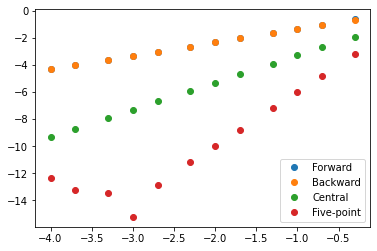

In [7]:
diff_values = np.zeros((len(hs),4))
k = 0
methods = [forward_diff , backward_diff , central_diff , five_point_approx]
descriptions = ["Forward","Backward","Central","Five-point"]
k = 0
for method in methods:
    ys = [abs(method(f,xn,h)-exact) for h in hs]
    plt.plot(np.log10(hs),np.log10(ys),"o",label=descriptions[k])
    plt.legend()
    k += 1

### 1.c
- We can clearly see that the method of five-points is giving us the slope of 4. 
- The slopes are errors by the power of 'h' for any given method.

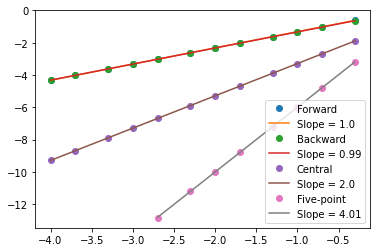

In [8]:
def eq_of_line(xs, p0, p1):
    return p0*xs+p1

# creating an array to store the differences
diff_values = np.zeros((len(hs),4))
k = 0
methods = [forward_diff,backward_diff,central_diff,five_point_approx]
descriptions = ["Forward","Backward","Central","Five-point"]
k = 0
for method in methods:
    ys = np.log10([abs(method(f,xn,h)-exact) for h in hs])
    xs = np.log10(hs)
    #plt.figure()
    if k==3:
        numdata = 8
    else:
        numdata = len(hs)
    xs = xs[:numdata]
    ys = ys[:numdata]
    plt.plot(xs,ys,"o",label=descriptions[k])
    params, covariance = curve_fit(eq_of_line, xs, ys, p0=[1.0, 1.0])
    plt.plot(xs, eq_of_line(xs, params[0], params[1]),label="Slope = "+str(round(params[0],2)))
    plt.legend()
    k += 1

## Q2
### 0. Defining the given methods
- Below methods are then to be used all throughout the 2nd Question
- The integration and the differentiation of e^x is e^x, we can comfortably make the functions, I would then compare them with the actual e^x value.
- if we put f(x = x_i), it's named as f_i
- x_1 & x_2 are the limits to which this loop would run for the integration 
- this `m`, is used to know what is the number of iterations that would run for each check/numerical attempt

In [9]:
def linear(f, x_1, x_2, m):
    N = 2 * m + 1
    first_point = f(x_1)
    net = 0
    h = (x_2 - x_1) / (N - 1)
    last_point = f(x_2)
    ## we would loop though N times, looped from h to (1 - h)
    second_term = 0
    
    for i in np.arange(h, 1, h):
        second_term += f(i)
    
    net = h * (first_point + last_point + (2 * second_term)) / 2
    #print(first_point, last_point, second_term)
    
    return net

def quadratic(f, x_1, x_2, m):
    N = 2*m + 1
    h = (x_2 - x_1) / (N - 1)

    odd_sum = 0
    even_sum = 0

    for i in range(1, N-1):
        x = x_1 + i*h
        if i % 2 == 1:
            odd_sum += f(x)
        else:
            even_sum += f(x)

    net = (h/3) * (
        f(x_1) +
        4*odd_sum +
        2*even_sum +
        f(x_2)
    )

    return net

def cubic(f, x_1, x_2, m):
    N = 3*m + 1
    h = (x_2 - x_1) / (N - 1)

    odd_sum = 0
    even_sum = 0

    for i in range(1, N-1):
        x = x_1 + i*h
        if i % 3 == 0:
            odd_sum += f(x)
        else:
            even_sum += f(x)

    net = (3*h/8) * (
        f(x_1) +
        2*odd_sum +
        3*even_sum +
        f(x_2)
    )

    return net

def quartic(f, x_1, x_2, m):
    N = 4*m + 1
    h = (x_2 - x_1) / (N - 1)

    odd_sum = 0
    twos_sum = 0
    even_sum = 0

    for i in range(1, N-1):
        x = x_1 + i*h
        if i % 4 == 1 or i % 4 == 3:
            odd_sum += f(x)
        elif i % 4 == 2:
            twos_sum += f(x)
        else:
            even_sum += f(x)

    net = (2*h/45) * (
        7 * f(x_1) +
        32*odd_sum +
        12*twos_sum +
        14*even_sum +
        7 * f(x_2)
    )

    return net

ms = [4, 8, 16, 32, 64]
x_1 = 0 #lower limit
x_2 = 1 #upper limit

### 2.a

In [10]:
print("%10s %10s %10s %10s %10s"%("m","linear","quadratic","cubic","quartic"))
print()
for m in ms:
    print((m, linear(np.exp, x_1, x_2, m), quadratic(np.exp, x_1, x_2, m),cubic(np.exp, x_1, x_2, m),quartic(np.exp, x_1, x_2, m)))

         m     linear  quadratic      cubic    quartic

(4, 1.7205185921643018, 1.718284154699897, 1.7182828625574946, 1.7182818286753585)
(8, 1.7188411285799945, 1.7182819740518918, 1.71828189317032, 1.7182818284624306)
(16, 1.7184216603163271, 1.7182818375617717, 1.7182818325047535, 1.7182818284590977)
(32, 1.7183167868500941, 1.7182818290280149, 1.7182818287119215, 1.7182818284590455)
(64, 1.718290568083478, 1.7182818284946066, 1.7182818284748504, 1.7182818284590453)


### 2.b

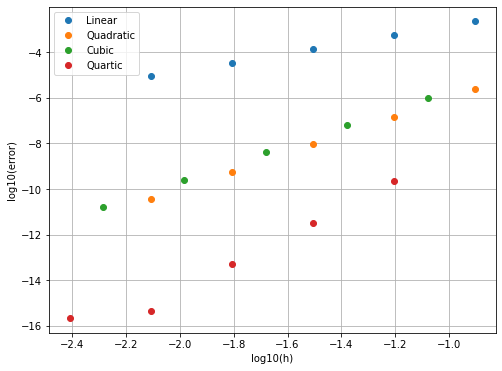

In [11]:
diff_values = np.zeros((len(ms),4))
k = 0
methods = [linear , quadratic , cubic , quartic]
exact = np.exp(1.0) - 1.0
descriptions = ["Linear","Quadratic","Cubic","Quartic"]
k = 0
plt.figure(figsize=(8,6))
for k, method in enumerate(methods):
    ys = [abs(method(np.exp, x_1, x_2, m) - exact) for m in ms]

    if method in (linear, quadratic):
        hs = [1/(2*m) for m in ms]
    elif method == cubic:
        hs = [1/(3*m) for m in ms]
    else:  # quartic
        hs = [1/(4*m) for m in ms]

    ys = np.array(ys)
    hs = np.array(hs)

    mask = ys > 0
    plt.plot(np.log10(hs[mask]), np.log10(ys[mask]), "o",
             label=descriptions[k])

plt.xlabel("log10(h)")
plt.ylabel("log10(error)")
plt.legend()
plt.grid(True)
plt.show()

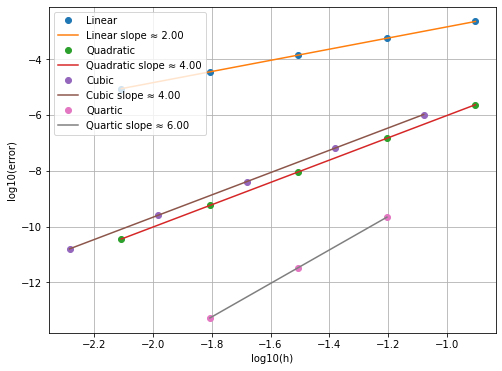

In [12]:
def eq_of_line(xs, p0, p1):
    return p0*xs+p1
plt.figure(figsize=(8,6))
# creating an array to store the differences
k = 0
methods = [linear , quadratic , cubic , quartic]
exact = np.exp(1.0) - 1.0
descriptions = ["Linear","Quadratic","Cubic","Quartic"]
for k, method in enumerate(methods):

    # --- step size ---
    if method in (linear, quadratic):
        hs = np.array([1/(2*m) for m in ms])
    elif method == cubic:
        hs = np.array([1/(3*m) for m in ms])
    else:  # quartic
        hs = np.array([1/(4*m) for m in ms])

    # --- errors ---
    errors = np.array([
        abs(method(np.exp, x_1, x_2, m) - exact)
        for m in ms
    ])

    # --- remove zero / underflow ---
    mask = errors > 0
    hs = hs[mask]
    errors = errors[mask]

    # --- log scale ---
    xs = np.log10(hs)
    ys = np.log10(errors)

    # --- truncate roundoff-dominated region ---
    if method == quartic:
        numdata = len(xs) - 2   # drop last 2 (smallest h)
        xs = xs[:numdata]
        ys = ys[:numdata]

    # --- plot points ---
    plt.plot(xs, ys, "o", label=descriptions[k])

    # --- fit ---
    params, _ = curve_fit(eq_of_line, xs, ys)
    plt.plot(xs, eq_of_line(xs, *params),
             label=f"{descriptions[k]} slope ≈ {params[0]:.2f}")
plt.xlabel("log10(h)")
plt.ylabel("log10(error)")
plt.legend()
plt.grid(True)
plt.show()

### Q3


In [13]:
# --- transformed integrand after substitution ---
def g1(t):
    return 3.0 * (1.0 - t**3) ** (-1 / 3)

def g2(u):
    return 3.0 * u * (1 - u**3) ** (-2 / 3)

exact = 2.0 * np.pi / np.sqrt(3.0)
t_max = 0.5 ** (1 / 3)
m = 100
## --- cubic have already been defined by me --- 
I1 = cubic(g1, 0.0, t_max, m)
I2 = cubic(g2, 0.0, t_max, m)
net = I1 + I2
print(f"Comparing both the cubic and the exact one, we get {net} ,{exact}, error = {abs(net - exact):.10f}")

Comparing both the cubic and the exact one, we get 3.627598729575155 ,3.6275987284684357, error = 0.0000000011
